# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import roc_curve

# 2. Importing Dataset

In [2]:
df = pd.read_csv('credit_dataset.csv')
df.replace('?', np.NaN, inplace=True)
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes
1,Male,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,Yes


# 3. Performing exploratory data analysis (EDA), handling missing values and handling outliers

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          677 non-null    object 
 1   Age             677 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         683 non-null    object 
 4   BankCustomer    683 non-null    object 
 5   EducationLevel  680 non-null    object 
 6   Ethnicity       680 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         676 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


(689, 16)

In [4]:
df['Age']=df['Age'].astype('float64')

## Handling missing values

In [5]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Ethnicity'>

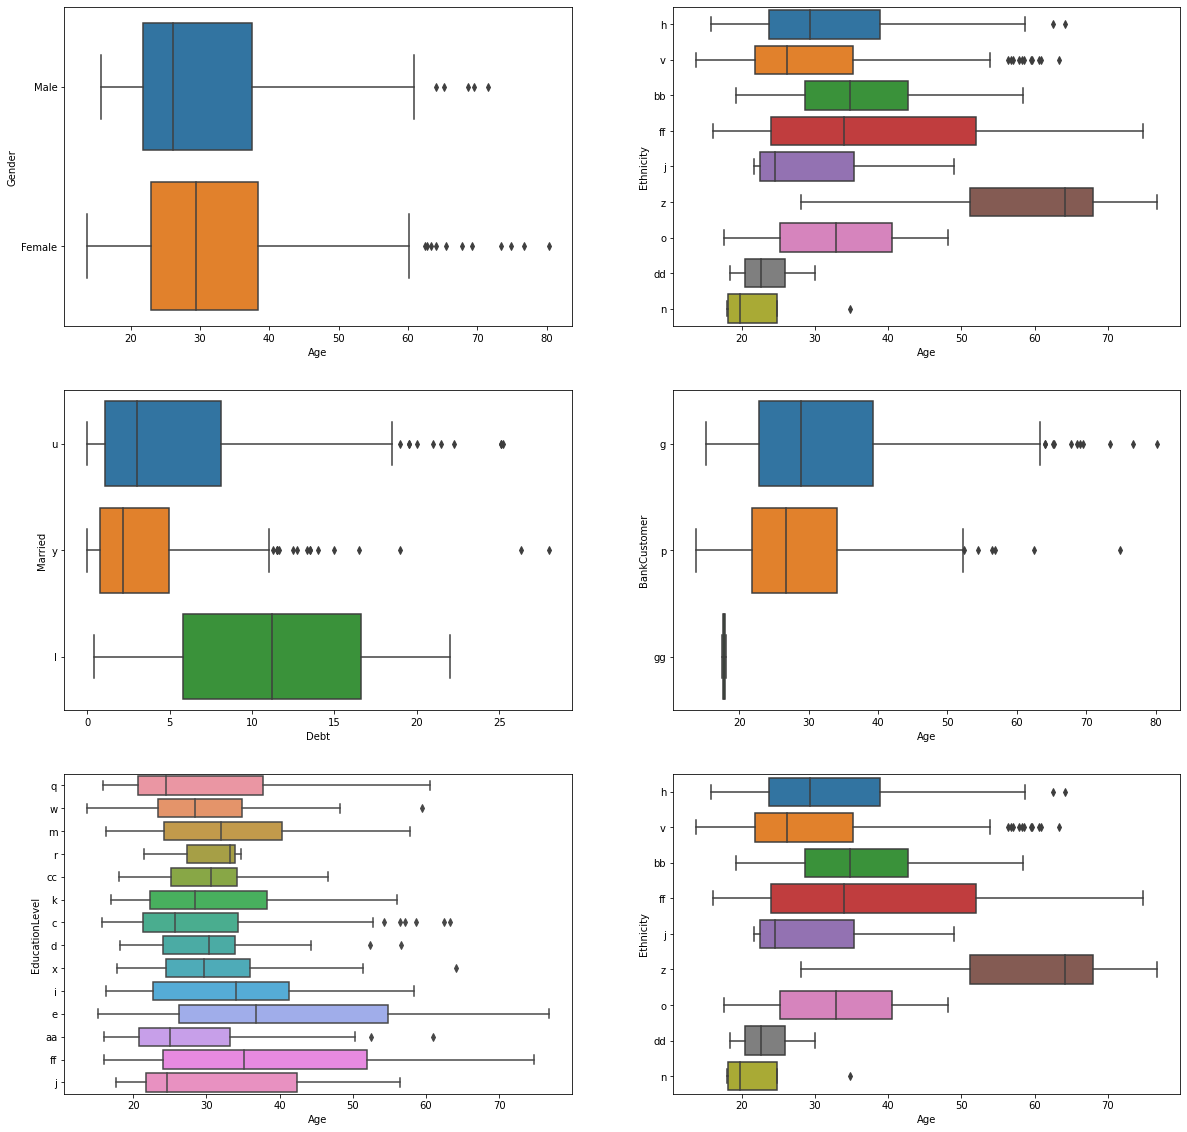

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='Age',y='Gender', data=df)
plt.subplot(3,2,2)
sns.boxplot(x='Age',y='Ethnicity', data=df)
plt.subplot(3,2,3)
sns.boxplot(x='Debt',y='Married', data=df)
plt.subplot(3,2,4)
sns.boxplot(x='Age',y='BankCustomer', data=df)
plt.subplot(3,2,5)
sns.boxplot(x='Age',y='EducationLevel', data=df)
plt.subplot(3,2,6)
sns.boxplot(x='Age',y='Ethnicity', data=df)

In [7]:
def impute_gender(cols):
    Gender = cols[0]
    Age = cols[1]
    
    if pd.isnull(Gender):
        
        if Age <=25 :
            return 'Male'
        
        else:
            return 'Female'
        
    else:
        return Gender

In [8]:
df['Gender'] = df[['Gender','Age']].apply(impute_gender,axis=1)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Ethnicity = cols[1]
    
    if pd.isnull(Age):
        
        if Ethnicity == 'h' :
            return 29
        elif Ethnicity == 'v' :
            return 26
        elif Ethnicity == 'bb' :
            return 35
        elif Ethnicity == 'ff' :
            return 34
        elif Ethnicity == 'j' :
            return 24
        elif Ethnicity == 'z' :
            return 65
        elif Ethnicity == 'o' :
            return 32
        elif Ethnicity == 'dd' :
            return 22
        else:
            return 19
        
    else:
        return Age

In [10]:
df['Age'] = df[['Age','Ethnicity']].apply(impute_age,axis=1)

In [11]:
# married missing is y as debt is 0 in all cases
df['Married'].fillna('y', inplace=True)

In [12]:
def impute_bankcustomer(cols):
    BankCustomer = cols[0]
    Age = cols[1]
    
    if pd.isnull(BankCustomer):
        
        if Age <=20 :
            return 'gg'
        elif 20 < Age < 26 :
            return 'p'
        else:
            return 'g'
        
    else:
        return BankCustomer

In [13]:
df['BankCustomer'] = df[['BankCustomer','Age']].apply(impute_bankcustomer,axis=1)

In [14]:
def impute_educationlevel(cols):
    EducationLevel = cols[0]
    Age = cols[1]
    
    if pd.isnull(EducationLevel):
        
        if Age <=24 :
            return 'q'
        elif 24 < Age <= 30 :
            return 'w'
        elif 30 < Age <= 33 :
            return 'cc'
        elif 33 < Age <= 37 :
            return 'i'
        else:
            return 'e'
        
    else:
        return EducationLevel

In [15]:
df['EducationLevel'] = df[['EducationLevel','Age']].apply(impute_educationlevel, axis=1)

In [16]:
def impute_ethnicity(cols):
    Ethnicity = cols[0]
    Age = cols[1]
    
    if pd.isnull(Ethnicity):
        
        if Age <=18 :
            return 'v'
        elif 18 < Age <= 22 :
            return 'n'
        elif 22 < Age <= 24 :
            return 'dd'
        elif 24 < Age <= 30 :
            return 'h'
        elif 30 < Age <= 50 :
            return 'ff'
        else:
            return 'z'
        
    else:
        return Ethnicity

In [17]:
df['Ethnicity'] = df[['Ethnicity', 'Age']].apply(impute_ethnicity, axis=1)

In [18]:
df = df.dropna(subset=['ZipCode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          676 non-null    object 
 1   Age             676 non-null    float64
 2   Debt            676 non-null    float64
 3   Married         676 non-null    object 
 4   BankCustomer    676 non-null    object 
 5   EducationLevel  676 non-null    object 
 6   Ethnicity       676 non-null    object 
 7   YearsEmployed   676 non-null    float64
 8   PriorDefault    676 non-null    object 
 9   Employed        676 non-null    object 
 10  CreditScore     676 non-null    int64  
 11  DriversLicense  676 non-null    object 
 12  Citizen         676 non-null    object 
 13  ZipCode         676 non-null    object 
 14  Income          676 non-null    int64  
 15  Approved        676 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 89.8+ KB


## Handling outliers

<AxesSubplot:xlabel='Income'>

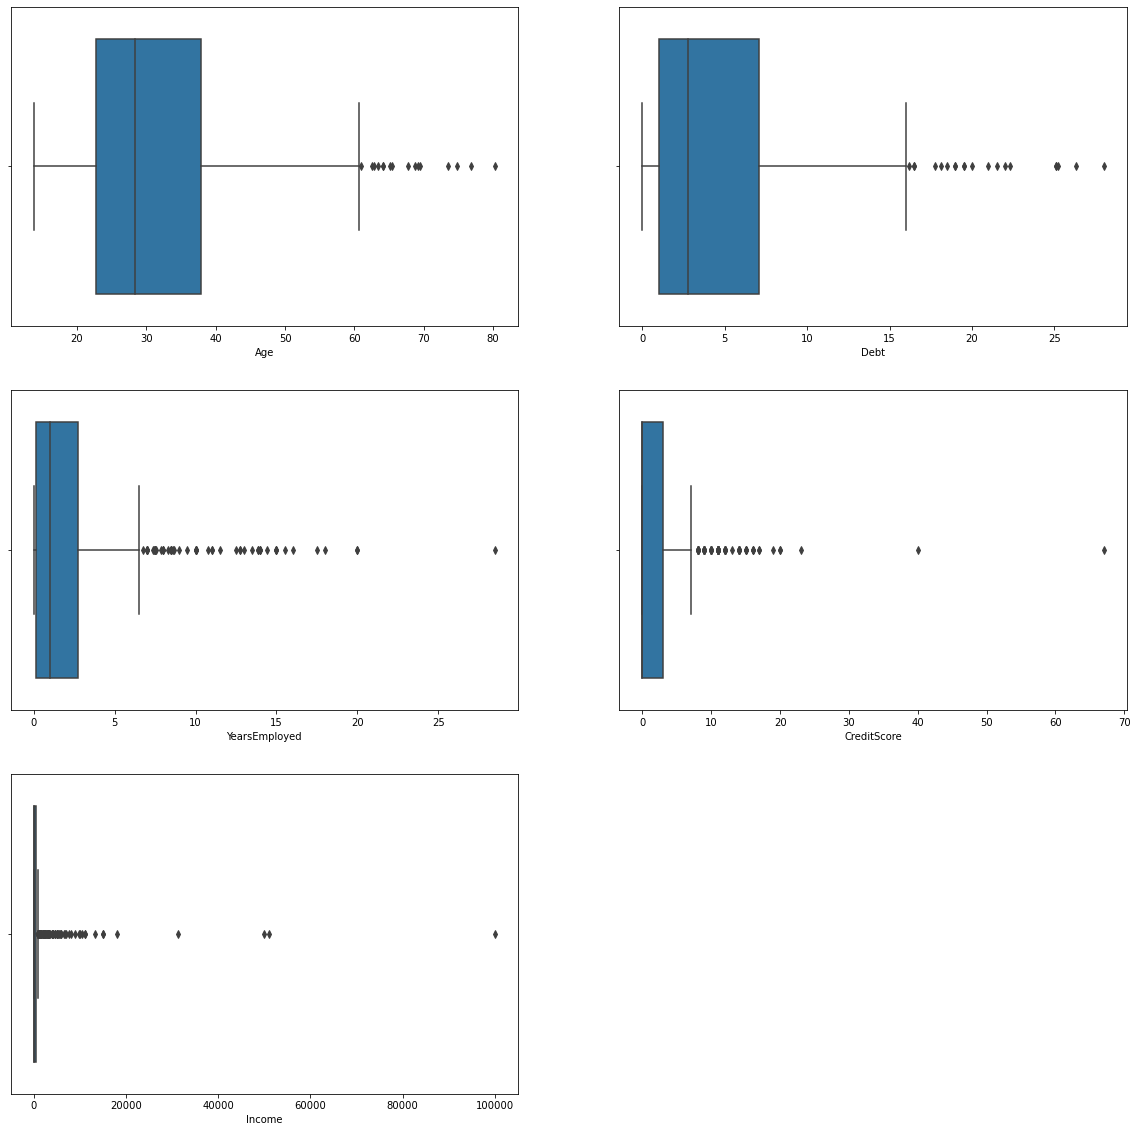

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='Age', data=df)
plt.subplot(3,2,2)
sns.boxplot(x='Debt', data=df)
plt.subplot(3,2,3)
sns.boxplot(x='YearsEmployed', data=df)
plt.subplot(3,2,4)
sns.boxplot(x='CreditScore', data=df)
plt.subplot(3,2,5)
sns.boxplot(x='Income', data=df)

In [20]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outlier_index = df.index[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    return outlier_index

In [21]:
list_index = []
for feature in ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']:
    list_index.extend(outliers(df, feature))

In [22]:
len(list_index)

281

In [23]:
df.corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.210896,0.399345,0.192061,0.027720
Debt,0.210896,1.000000,0.303427,0.272440,0.119857
YearsEmployed,0.399345,0.303427,1.000000,0.323994,0.051706
CreditScore,0.192061,0.272440,0.323994,1.000000,0.060464
Income,0.027720,0.119857,0.051706,0.060464,1.000000


# 4. Feature engineering & applying k-means clustering to perform binning technique

## Performing Min-Max Normalization

In [24]:
df_cluster = df.copy()
scaler = MinMaxScaler()
df_cluster[['age_n','debt_n','yearsemployed_n','creditscore_n','income_n']] = scaler.fit_transform(df_cluster[['Age','Debt','YearsEmployed','CreditScore','Income']])
df_cluster

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,...,DriversLicense,Citizen,ZipCode,Income,Approved,age_n,debt_n,yearsemployed_n,creditscore_n,income_n
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,...,f,g,43,560,Yes,0.675489,0.159286,0.106667,0.089552,0.00560
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,...,f,g,280,824,Yes,0.161654,0.017857,0.052632,0.000000,0.00824
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,...,t,g,100,3,Yes,0.211729,0.055000,0.131579,0.074627,0.00003
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,...,f,s,120,0,Yes,0.096541,0.200893,0.060000,0.000000,0.00000
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,...,t,g,360,0,Yes,0.275639,0.142857,0.087719,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,...,f,g,260,0,No,0.110226,0.360179,0.043860,0.000000,0.00000
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,...,t,g,200,394,No,0.134135,0.026786,0.070175,0.029851,0.00394
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,...,t,g,200,1,No,0.172932,0.482143,0.070175,0.014925,0.00001
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,...,f,g,280,750,No,0.062707,0.007321,0.001404,0.000000,0.00750


## Identifing optimum cluster count and binning numerical variables

C:\Users\gatea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


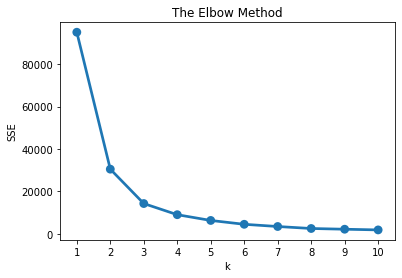

In [25]:
age_encoded = pd.get_dummies(df_cluster[['Age','Approved']])

sse={}
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(age_encoded)
    sse[k] = km.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [26]:
km = KMeans(n_clusters = 3, random_state=5)
km.fit(age_encoded)
cluster_labels = km.labels_
df = df.assign(age_cluster = cluster_labels)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_cluster
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes,1
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes,0
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes,0
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes,0
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,No,0
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,No,0
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,No,0
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,No,0


C:\Users\gatea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='age_cluster'>

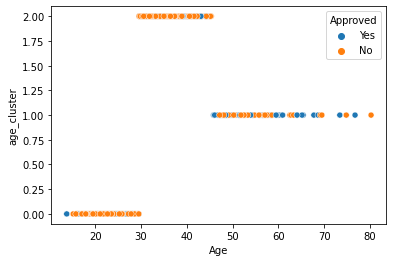

In [27]:
sns.scatterplot(df['Age'],df['age_cluster'], hue=df['Approved'])

C:\Users\gatea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


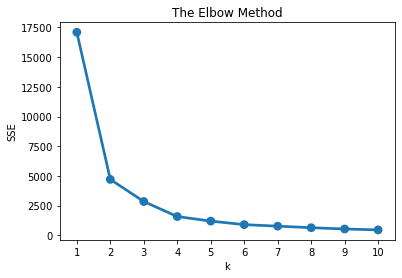

In [28]:
debt_encoded = pd.get_dummies(df_cluster[['Debt','Approved']])

sse={}
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(debt_encoded)
    sse[k] = km.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [29]:
km = KMeans(n_clusters = 3, random_state=5)
km.fit(debt_encoded)
cluster_labels = km.labels_
df = df.assign(debt_cluster = cluster_labels)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_cluster,debt_cluster
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes,1,0
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes,0,0
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes,0,0
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes,0,0
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,No,0,2
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,No,0,0
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,No,0,2
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,No,0,0


C:\Users\gatea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Debt', ylabel='debt_cluster'>

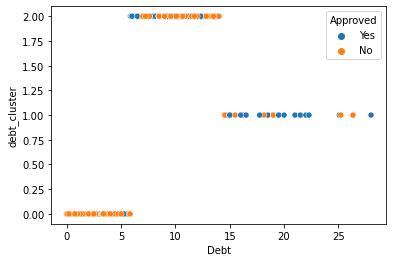

In [30]:
sns.scatterplot(df['Debt'],df['debt_cluster'], hue=df['Approved'])

C:\Users\gatea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


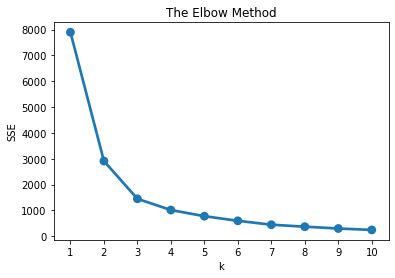

In [31]:
ye_encoded = pd.get_dummies(df_cluster[['YearsEmployed','Approved']])

sse={}
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(ye_encoded)
    sse[k] = km.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [32]:
km = KMeans(n_clusters = 3, random_state=5)
km.fit(ye_encoded)
cluster_labels = km.labels_
df = df.assign(yearsemployed_cluster = cluster_labels)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_cluster,debt_cluster,yearsemployed_cluster
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes,1,0,2
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes,0,0,1
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes,0,0,2
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes,0,0,1
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,Yes,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,No,0,2,1
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,No,0,0,1
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,No,0,2,1
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,No,0,0,1


C:\Users\gatea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsEmployed', ylabel='yearsemployed_cluster'>

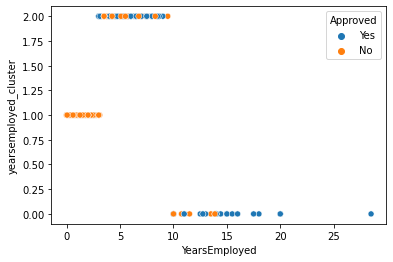

In [33]:
sns.scatterplot(df['YearsEmployed'],df['yearsemployed_cluster'], hue=df['Approved'])

C:\Users\gatea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


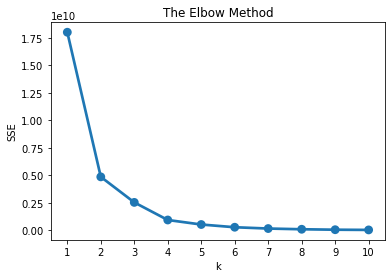

In [34]:
income_encoded = pd.get_dummies(df_cluster[['Income','Approved']])

sse={}
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(income_encoded)
    sse[k] = km.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [35]:
km = KMeans(n_clusters = 4, random_state=5)
km.fit(income_encoded)
cluster_labels = km.labels_
df = df.assign(income_cluster = cluster_labels)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_cluster,debt_cluster,yearsemployed_cluster,income_cluster
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes,1,0,2,0
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes,0,0,1,0
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,Yes,0,0,2,0
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,Yes,0,0,1,0
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,Yes,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,No,0,2,1,0
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,No,0,0,1,0
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,No,0,2,1,0
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,No,0,0,1,0


C:\Users\gatea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='income_cluster'>

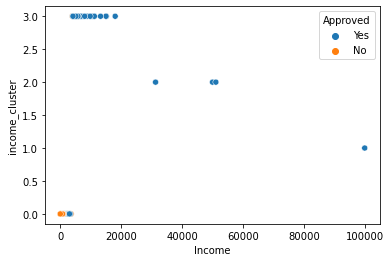

In [36]:
sns.scatterplot(df['Income'],df['income_cluster'], hue=df['Approved'])

In [37]:
print(df[['Age','age_cluster']].groupby('age_cluster').agg(['min', 'max']))
print(df[['Income','income_cluster']].groupby('income_cluster').agg(['min', 'max']))
print(df[['YearsEmployed','yearsemployed_cluster']].groupby('yearsemployed_cluster').agg(['min', 'max']))
print(df[['Debt','debt_cluster']].groupby('debt_cluster').agg(['min', 'max']))

               Age       
               min    max
age_cluster              
0            13.75  29.50
1            45.83  80.25
2            29.58  45.33
                Income        
                   min     max
income_cluster                
0                    0    3552
1               100000  100000
2                31285   51100
3                 4000   18027
                      YearsEmployed        
                                min     max
yearsemployed_cluster                      
0                              10.0  28.500
1                               0.0   3.085
2                               3.0   9.460
                Debt        
                 min     max
debt_cluster                
0              0.000   5.835
1             14.500  28.000
2              5.875  14.000


## Binning variables

In [38]:
df['age_cluster']=df['age_cluster'].map({0:'13<age<30',1:'45<age<80',2:'30<age<45'})
df['income_cluster']=df['income_cluster'].map({0:'0<income<4k',1:'60k<income<100k)',2:'30k<income<60k',3:'4k<income<30k'})
df['yearsemployed_cluster']=df['yearsemployed_cluster'].map({0:'10<workexp<30',1:'0<workexp<3',2:'3<workexp<10'})
df['debt_cluster']=df['debt_cluster'].map({0:'0<debt<6',1:'14<debt<30',2:'6<debt<14'})
df['Approved']=df['Approved'].map({'Yes':1,'No':0})
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,age_cluster,debt_cluster,yearsemployed_cluster,income_cluster
0,Male,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1,45<age<80,0<debt<6,3<workexp<10,0<income<4k
1,Male,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1,13<age<30,0<debt<6,0<workexp<3,0<income<4k
2,Female,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1,13<age<30,0<debt<6,3<workexp<10,0<income<4k
3,Female,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1,13<age<30,0<debt<6,0<workexp<3,0<income<4k
4,Female,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,1,30<age<45,0<debt<6,0<workexp<3,0<income<4k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0,13<age<30,6<debt<14,0<workexp<3,0<income<4k
685,Male,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0,13<age<30,0<debt<6,0<workexp<3,0<income<4k
686,Male,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0,13<age<30,6<debt<14,0<workexp<3,0<income<4k
687,Female,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0,13<age<30,0<debt<6,0<workexp<3,0<income<4k


# 5. Implementing and Evaluating Machine Learning Algorithms (CART, Random Forest Classifier and Support Vector Classifier

In [39]:
dfml = df.copy()
dfml.drop(columns = ['Age','Debt','YearsEmployed','CreditScore', 'ZipCode', 'Income'], inplace=True)
dfml

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,age_cluster,debt_cluster,yearsemployed_cluster,income_cluster
0,Male,u,g,q,h,t,t,f,g,1,45<age<80,0<debt<6,3<workexp<10,0<income<4k
1,Male,u,g,q,h,t,f,f,g,1,13<age<30,0<debt<6,0<workexp<3,0<income<4k
2,Female,u,g,w,v,t,t,t,g,1,13<age<30,0<debt<6,3<workexp<10,0<income<4k
3,Female,u,g,w,v,t,f,f,s,1,13<age<30,0<debt<6,0<workexp<3,0<income<4k
4,Female,u,g,m,v,t,f,t,g,1,30<age<45,0<debt<6,0<workexp<3,0<income<4k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Female,y,p,e,h,f,f,f,g,0,13<age<30,6<debt<14,0<workexp<3,0<income<4k
685,Male,u,g,c,v,f,t,t,g,0,13<age<30,0<debt<6,0<workexp<3,0<income<4k
686,Male,y,p,ff,ff,f,t,t,g,0,13<age<30,6<debt<14,0<workexp<3,0<income<4k
687,Female,u,g,aa,v,f,f,f,g,0,13<age<30,0<debt<6,0<workexp<3,0<income<4k


In [40]:
dfml.nunique()

Gender                    2
Married                   3
BankCustomer              3
EducationLevel           14
Ethnicity                 9
PriorDefault              2
Employed                  2
DriversLicense            2
Citizen                   3
Approved                  2
age_cluster               3
debt_cluster              3
yearsemployed_cluster     3
income_cluster            4
dtype: int64

In [41]:
#separating input and output features
X= dfml.drop(['Approved'], axis=1, inplace=False)
y= dfml['Approved']

## One Hot Encoding

In [42]:
x_fe = pd.get_dummies(X)
x_fe

,Gender_Female,Gender_Male,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,EducationLevel_aa,EducationLevel_c,...,debt_cluster_0<debt<6,debt_cluster_14<debt<30,debt_cluster_6<debt<14,yearsemployed_cluster_0<workexp<3,yearsemployed_cluster_10<workexp<30,yearsemployed_cluster_3<workexp<10,income_cluster_0<income<4k,income_cluster_30k<income<60k,income_cluster_4k<income<30k,income_cluster_60k<income<100k)
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
685,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
686,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
687,1,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
684    0
685    0
686    0
687    0
688    0
Name: Approved, Length: 676, dtype: int64

## Decision Tree Classifier (Using entropy)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_fe,y, test_size=0.25, stratify=y, random_state=5)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=5)

In [45]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:') 
print(round(dt.score(X_test, y_test)*100,2))
print(confusion_matrix(y_test, y_pred))
export_graphviz(dt,"tree.dot")

Accuracy:
86.98
[[82 12]
 [10 65]]


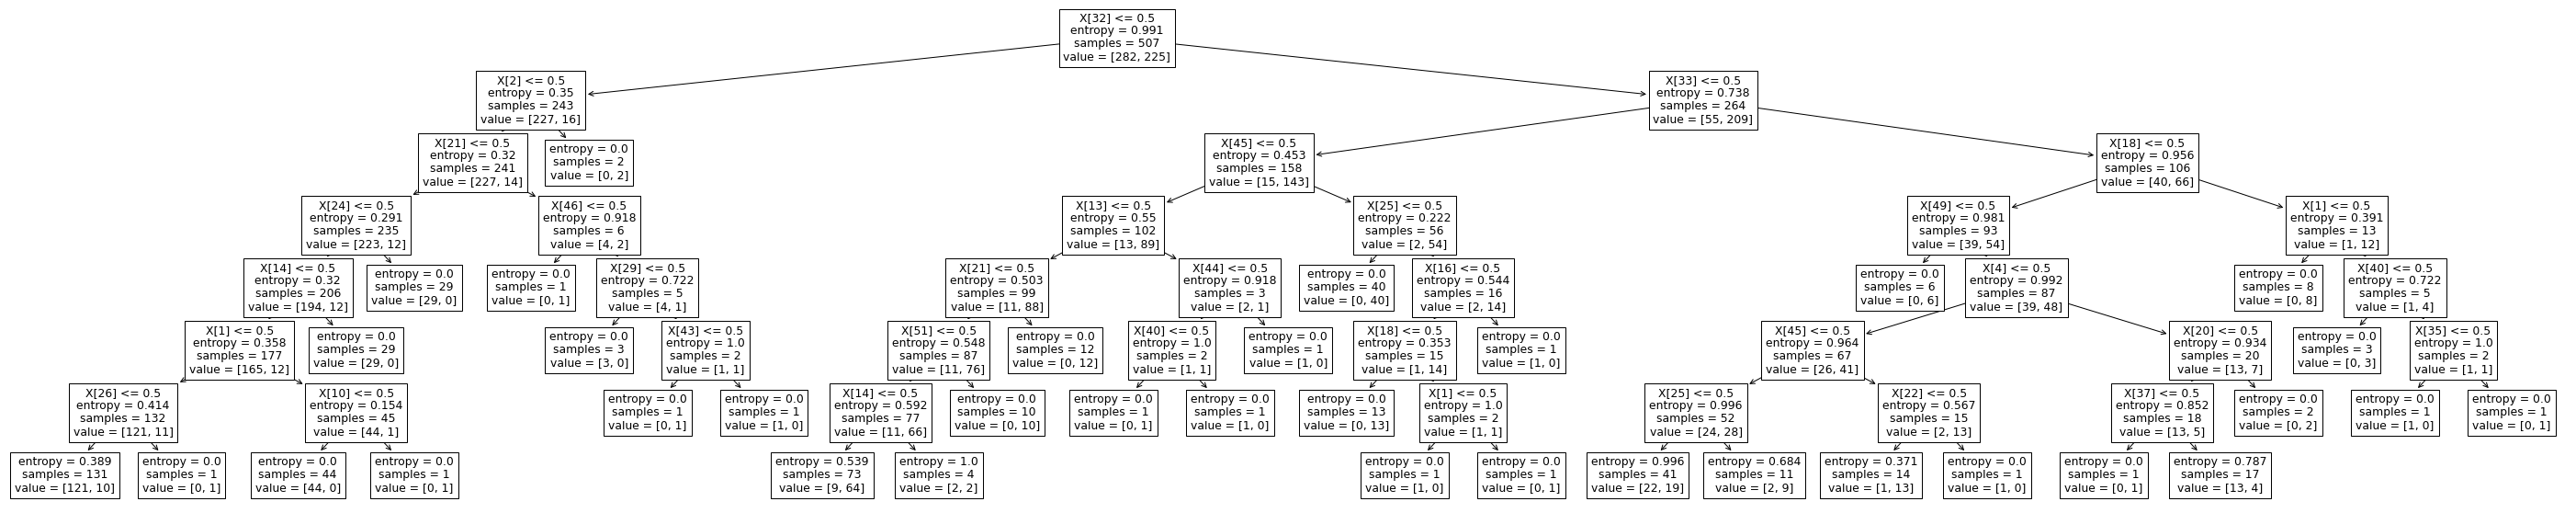

In [46]:
plt.figure(figsize=(50,10))
_=tree.plot_tree(dt)

## Random Forest Classifier

In [47]:
dt_rfc = ensemble.RandomForestClassifier(n_estimators=100)
dt_rfc.fit(X_train, y_train)
print('Accuracy:') 
print(round(dt_rfc.score(X_test, y_test)*100,2))

Accuracy:
86.39


## Support Vector Classifier

In [48]:
dt_svc = SVC(probability=True)
dt_svc.fit(X_test, y_test)
print('Accuracy:')
print(round(dt_svc.score(X_test, y_test)*100,2))

Accuracy:
94.08


## Plotting ROC Curve

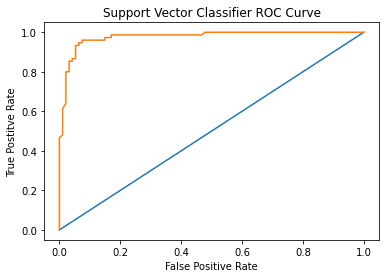

In [49]:
y_pred_probs = dt_svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('Support Vector Classifier ROC Curve')
plt.show()

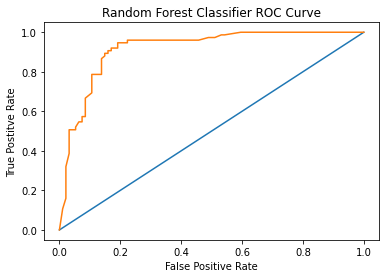

In [50]:
y_pred_probs_rfc = dt_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rfc)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.show()

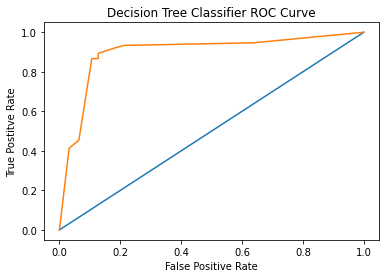

In [51]:
y_pred_probs_cart = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_cart)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitve Rate')
plt.title('Decision Tree Classifier ROC Curve')
plt.show()

# We can conclude that Support Vector Classifier performs the best for this dataset with the accuracy score of 94%